In [1]:
import numpy as np
import pickle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from mpl_toolkits import mplot3d
import time

In [2]:
from rawFLIR_polarization_data_extraction import *
from slope2height import *

In [3]:
NUM_IMAGES=1
BEDFORM = 'canopy'
file_location = "../FLIR_Camera/"+BEDFORM+"_fastFlow_ShallowH_test1_centeredCam_flume_LookAngle_35Deg"
ref_image_name = 'reference.tiff'
figures_location = "../FLIR_Camera/"+BEDFORM+"_fastFlow_ShallowH_test1_centeredCam_flume_LookAngle_35Deg_FIGURES"
height_figs_location  = "../FLIR_Camera/"+BEDFORM+"_fastFlow_ShallowH_test1_centeredCam_flume_LookAngle_35Deg_HEIGHT_FIGURES"
save_location =  "../FLIR_Camera"
data_filename = BEDFORM + "_fastFlow_ShallowH_test1.pickle"
dark_files_location = "../FLIR_Camera/dark_imgs"
flat_files_location = "../FLIR_Camera/flat_imgs"

In [4]:
filenames = os.listdir(file_location)
filenames.remove(ref_image_name) 

In [5]:
print(len(filenames))

72


Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.034956932067871094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0459742546081543 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


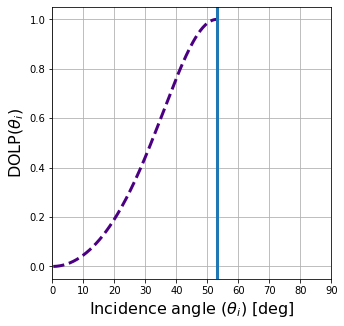

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.593234062194824 seconds
False
AoLP time:  0.04697394371032715 s


In [6]:
im_theta1, im_phi1 = theta_phi(ref_image_name, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030980825424194336 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097700119018555 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


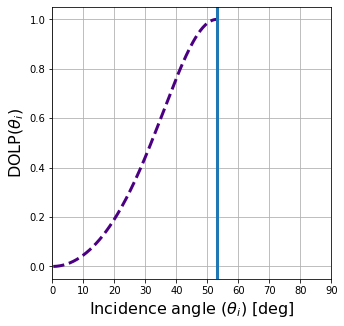

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.371679544448853 seconds
False
AoLP time:  0.054006338119506836 s


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:29<00:00, 29.48s/it]


In [7]:
for filename2 in tqdm(filenames[0:1]): #
    im_theta2, im_phi2 = theta_phi(filename2, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

    raw_img2 = cv2.imread(os.path.join(file_location, filename2))

<Figure size 432x288 with 0 Axes>

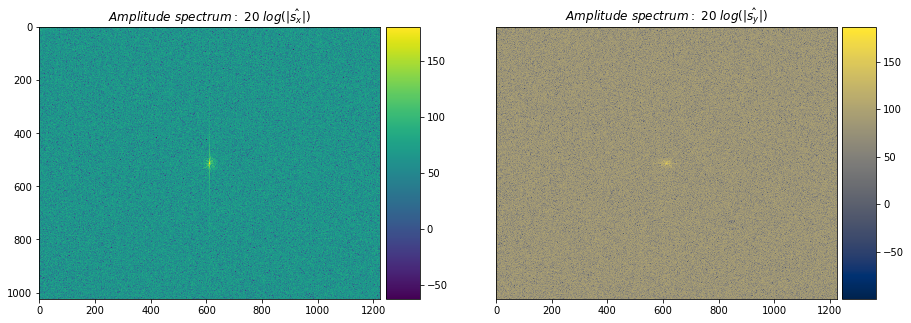

<Figure size 432x288 with 0 Axes>

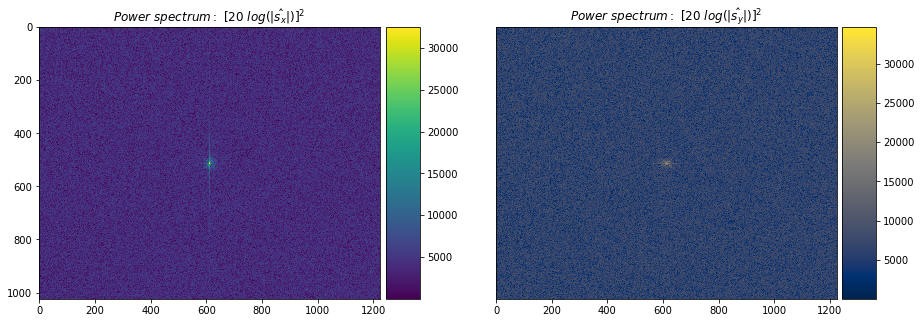

In [8]:
s_x = np.tan(np.radians((im_theta2 - im_theta1)))
s_y = np.tan(np.radians((im_phi2 - im_phi1)))
s_hat_x, s_hat_y = slopeFieldFFT(s_x, s_y)
height_map = slope2height(s_hat_x, s_hat_y)

<Figure size 432x288 with 0 Axes>

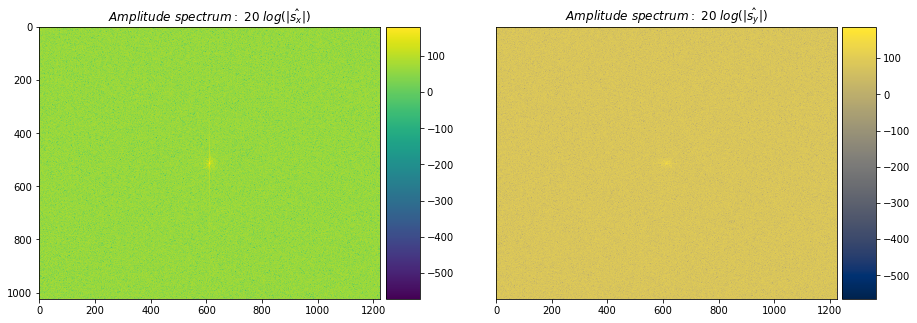

<Figure size 432x288 with 0 Axes>

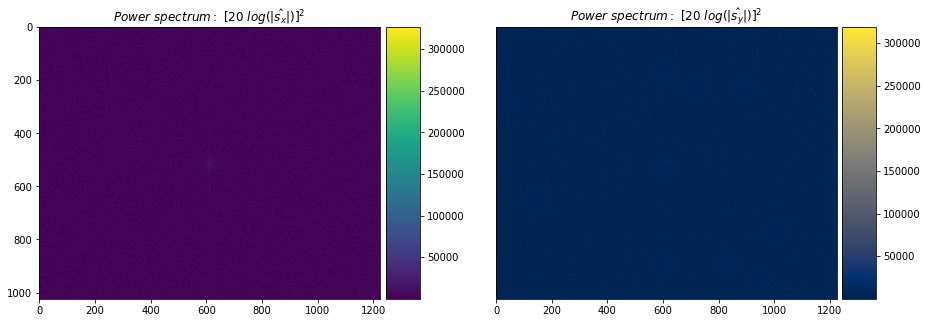

In [9]:
s_hat_x_noDC, s_hat_y_noDC = slopeFieldFFT(s_x - np.mean(s_x), s_y - np.mean(s_y))

When the input a is a time-domain signal and A = fft(a), np.abs(A) is its amplitude spectrum and np.abs(A)**2 is its power spectrum. The phase spectrum is obtained by np.angle(A).

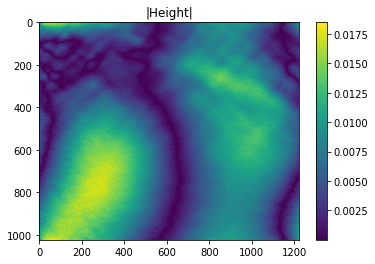

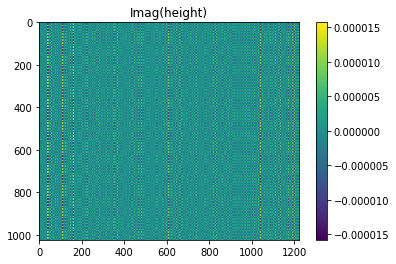

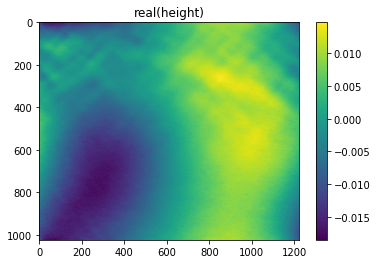

In [10]:
plt.figure()
plt.imshow(np.abs(height_map))
plt.colorbar()
plt.title('|Height|')
plt.show()

plt.figure()
plt.imshow(np.imag(height_map))
plt.colorbar()
plt.title('Imag(height)')
plt.show()

plt.figure()
plt.imshow(np.real(height_map))
plt.colorbar()
plt.title('real(height)')
plt.show()



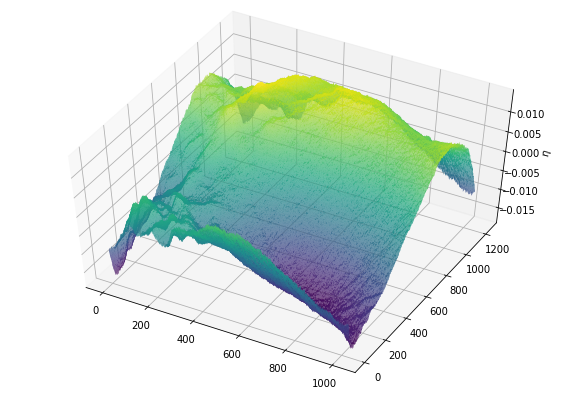

33.05158257484436


In [11]:
# %matplotlib widget
rows, cols = s_x.shape
Z = np.real(height_map)
X,Y = np.meshgrid(np.arange(0,cols), np.arange(0,rows))

fig = plt.figure(figsize = (10,7)) 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 

tic = time.time()
# syntax for plotting 
p = ax.plot_surface(Y, X, Z, cmap ='viridis', rstride = 2, cstride = 2)#, edgecolor ='green') 
# ax.set_title('Height map')
ax.set_zlabel('$\\eta$')
ax.view_init(azim = -61, elev = 52)
plt.show() 
toc = time.time()
print(toc-tic)

# SAVE the height, slope, raw data maps

In [12]:
all_height_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))
all_sx_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))
all_sy_maps = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))
all_raw_frames_0filter = np.zeros((im_theta1.shape[0],im_theta1.shape[1],len(filenames)))

  0%|                                                                                           | 0/72 [00:00<?, ?it/s]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03497934341430664 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697919845581055 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


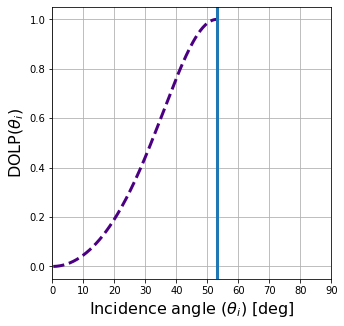

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.758163452148438 seconds
False
AoLP time:  0.041980743408203125 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  1%|█▏                                                                                 | 1/72 [00:32<38:47, 32.78s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598428726196289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897809982299805 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


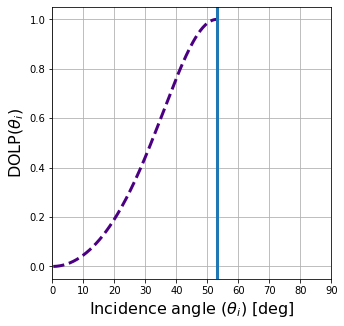

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.44427227973938 seconds
False
AoLP time:  0.04198265075683594 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  3%|██▎                                                                                | 2/72 [01:04<37:47, 32.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983592987060547 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.045972347259521484 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


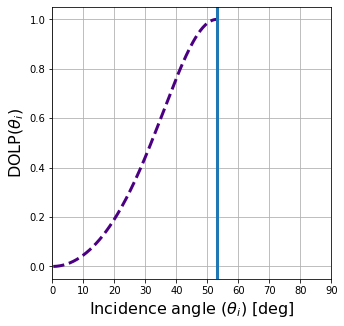

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.786619901657104 seconds
False
AoLP time:  0.06296324729919434 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  4%|███▍                                                                               | 3/72 [01:36<37:20, 32.46s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.031982421875 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037979841232299805 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


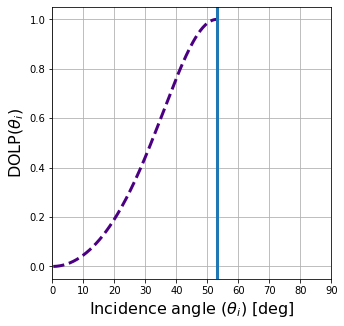

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.538560390472412 seconds
False
AoLP time:  0.05296897888183594 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  6%|████▌                                                                              | 4/72 [02:09<36:46, 32.45s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028492450714111328 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036978721618652344 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


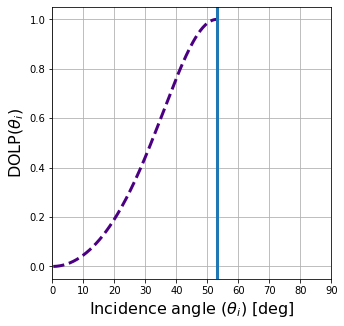

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.06725573539734 seconds
False
AoLP time:  0.04697275161743164 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  7%|█████▊                                                                             | 5/72 [02:37<34:46, 31.15s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02898383140563965 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697967529296875 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


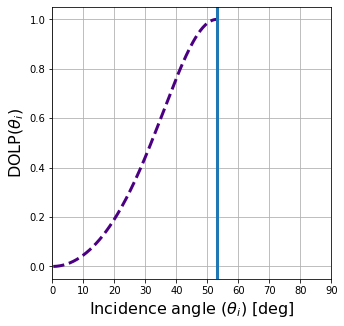

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.2603816986084 seconds
False
AoLP time:  0.04097628593444824 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  8%|██████▉                                                                            | 6/72 [03:09<34:39, 31.50s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03098130226135254 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697776794433594 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


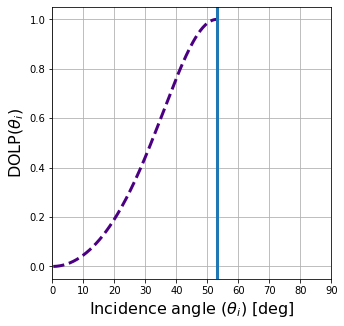

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.66418957710266 seconds
False
AoLP time:  0.04597282409667969 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 10%|████████                                                                           | 7/72 [03:39<33:35, 31.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.034979820251464844 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04348134994506836 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


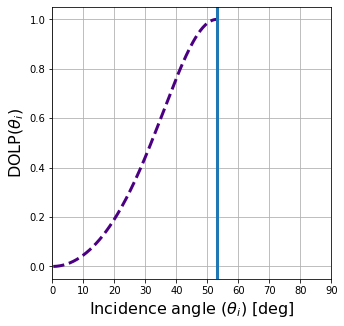

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.46798610687256 seconds
False
AoLP time:  0.04297471046447754 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 11%|█████████▏                                                                         | 8/72 [04:12<33:38, 31.54s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982566833496094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.048974037170410156 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


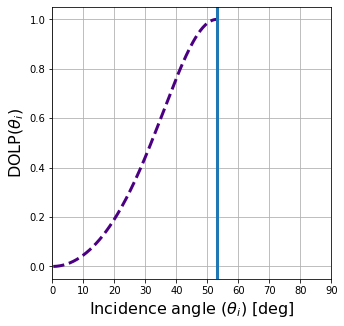

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.485663652420044 seconds
False
AoLP time:  0.05596756935119629 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 12%|██████████▍                                                                        | 9/72 [04:43<32:50, 31.28s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


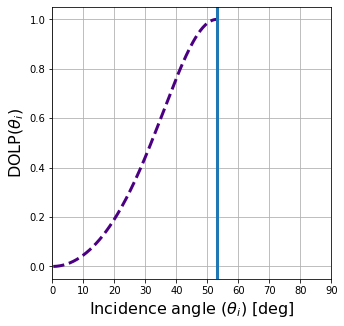

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.09844183921814 seconds
False
AoLP time:  0.04897189140319824 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 14%|███████████▍                                                                      | 10/72 [05:12<31:39, 30.64s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029987335205078125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.039975643157958984 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


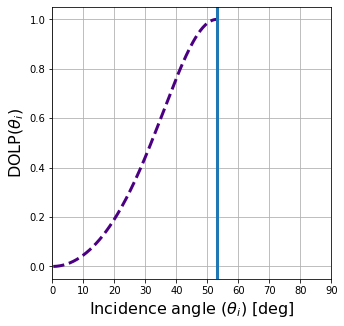

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.778184175491333 seconds
False
AoLP time:  0.041975975036621094 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 15%|████████████▌                                                                     | 11/72 [05:40<30:33, 30.05s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028983354568481445 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.036980390548706055 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


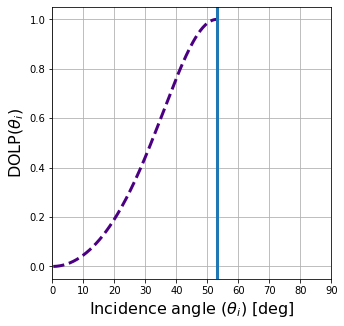

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.970257997512817 seconds
False
AoLP time:  0.039978742599487305 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 17%|█████████████▋                                                                    | 12/72 [06:08<29:24, 29.40s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.032980918884277344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697824478149414 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


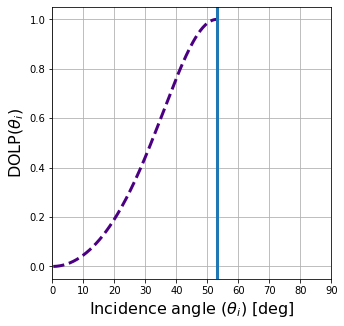

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.163644790649414 seconds
False
AoLP time:  0.043973684310913086 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 18%|██████████████▊                                                                   | 13/72 [06:38<29:08, 29.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028492212295532227 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


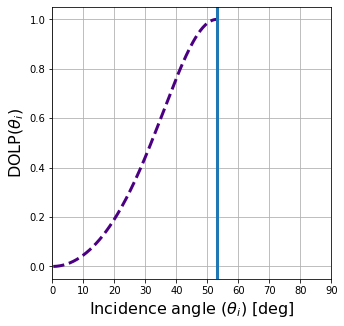

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.024322271347046 seconds
False
AoLP time:  0.04298043251037598 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 19%|███████████████▉                                                                  | 14/72 [07:11<29:28, 30.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03499293327331543 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.052968740463256836 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


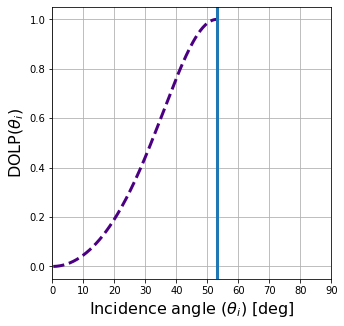

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.301841020584106 seconds
False
AoLP time:  0.05396676063537598 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 21%|█████████████████                                                                 | 15/72 [07:42<29:02, 30.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03997611999511719 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0419769287109375 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


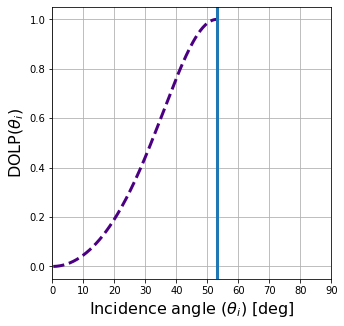

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.575337648391724 seconds
False
AoLP time:  0.04397439956665039 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 22%|██████████████████▏                                                               | 16/72 [08:17<29:47, 31.92s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03298163414001465 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05097031593322754 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


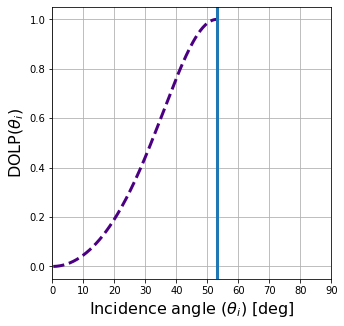

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.492608308792114 seconds
False
AoLP time:  0.04499244689941406 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 24%|███████████████████▎                                                              | 17/72 [08:54<30:41, 33.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0319819450378418 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.047484397888183594 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


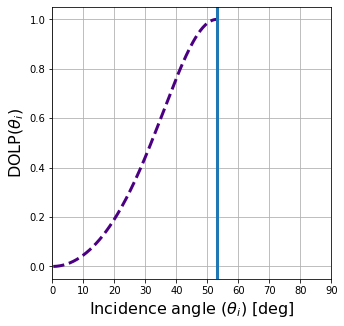

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.31544017791748 seconds
False
AoLP time:  0.05596637725830078 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 25%|████████████████████▌                                                             | 18/72 [09:31<31:06, 34.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.033979177474975586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.043973684310913086 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


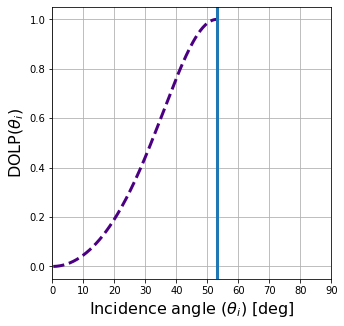

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  29.8265860080719 seconds
False
AoLP time:  0.04847979545593262 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 26%|█████████████████████▋                                                            | 19/72 [10:06<30:44, 34.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029981136322021484 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.042974233627319336 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


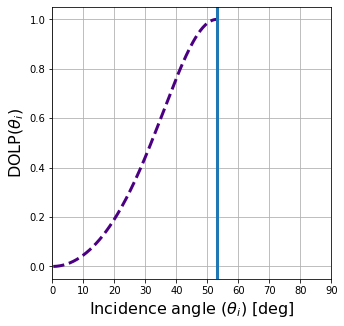

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  31.784061431884766 seconds
False
AoLP time:  0.04597306251525879 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 28%|██████████████████████▊                                                           | 20/72 [10:44<30:54, 35.67s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.037488698959350586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297494888305664 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


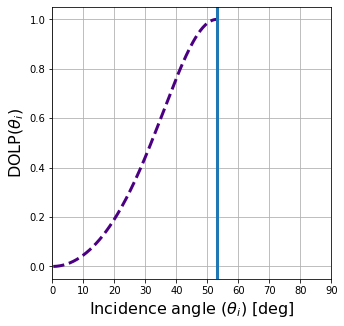

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  28.140406847000122 seconds
False
AoLP time:  0.05034351348876953 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 29%|███████████████████████▉                                                          | 21/72 [11:18<29:51, 35.12s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027974367141723633 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0379791259765625 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


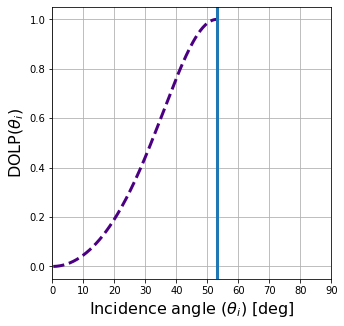

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.929321765899658 seconds
False
AoLP time:  0.04996967315673828 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 31%|█████████████████████████                                                         | 22/72 [11:50<28:34, 34.29s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028995037078857422 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03785562515258789 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


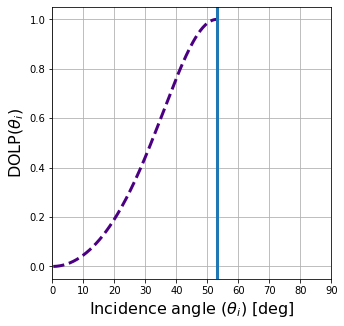

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.796135425567627 seconds
False
AoLP time:  0.0415802001953125 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 32%|██████████████████████████▏                                                       | 23/72 [12:20<26:48, 32.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03098773956298828 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997611999511719 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


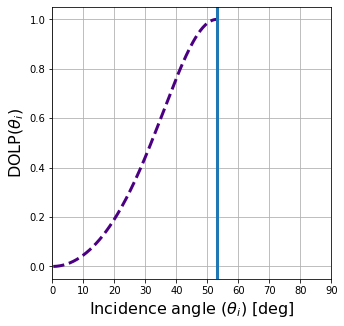

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.16574740409851 seconds
False
AoLP time:  0.041974544525146484 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 33%|███████████████████████████▎                                                      | 24/72 [12:47<24:54, 31.13s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03198122978210449 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04697227478027344 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


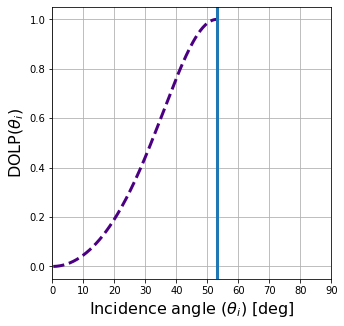

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.00381851196289 seconds
False
AoLP time:  0.046972036361694336 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 35%|████████████████████████████▍                                                     | 25/72 [13:17<24:11, 30.88s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.031981468200683594 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04297757148742676 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


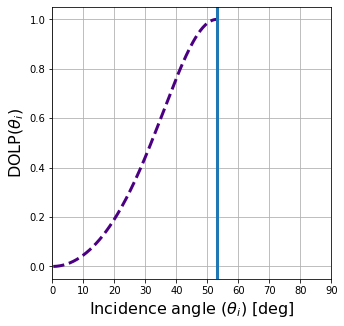

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.950725078582764 seconds
False
AoLP time:  0.04297447204589844 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 36%|█████████████████████████████▌                                                    | 26/72 [13:46<23:16, 30.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0299835205078125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497958183288574 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


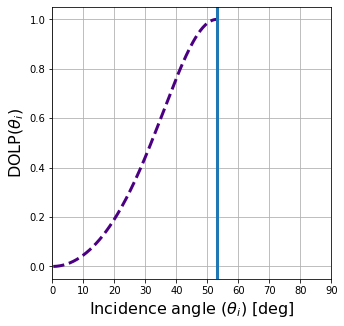

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.624019384384155 seconds
False
AoLP time:  0.043973684310913086 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 38%|██████████████████████████████▊                                                   | 27/72 [14:17<22:44, 30.32s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03997659683227539 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097557067871094 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


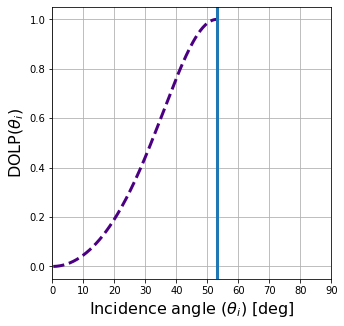

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.385587453842163 seconds
False
AoLP time:  0.04897189140319824 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 39%|███████████████████████████████▉                                                  | 28/72 [14:47<22:18, 30.42s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697991371154785 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


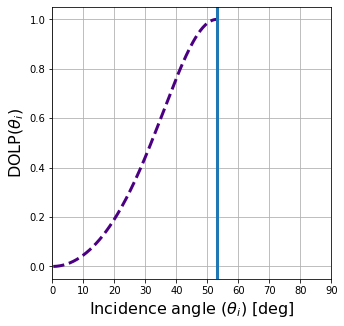

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.485920667648315 seconds
False
AoLP time:  0.04697227478027344 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 40%|█████████████████████████████████                                                 | 29/72 [15:20<22:24, 31.26s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.032982826232910156 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.040976762771606445 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


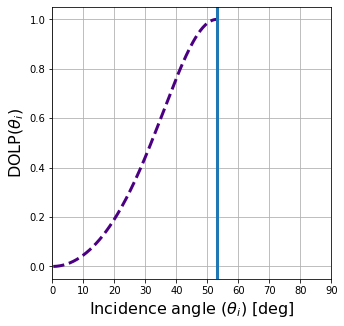

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.959600687026978 seconds
False
AoLP time:  0.0439755916595459 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 42%|██████████████████████████████████▏                                               | 30/72 [15:52<21:51, 31.23s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027982711791992188 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897738456726074 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


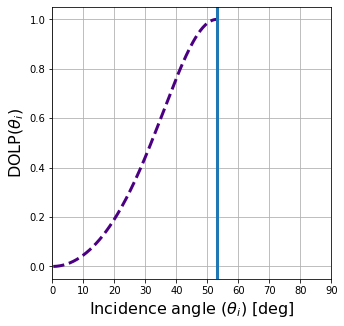

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.429757356643677 seconds
False
AoLP time:  0.04597902297973633 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 43%|███████████████████████████████████▎                                              | 31/72 [16:21<21:03, 30.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03548908233642578 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897571563720703 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


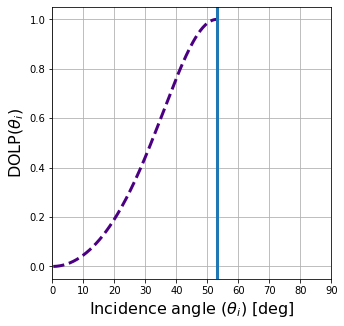

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.715424060821533 seconds
False
AoLP time:  0.04297494888305664 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 44%|████████████████████████████████████▍                                             | 32/72 [16:53<20:37, 30.93s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998185157775879 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04797244071960449 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


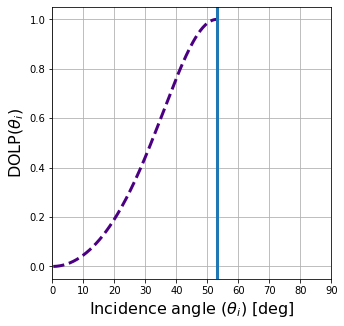

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.549976348876953 seconds
False
AoLP time:  0.046973228454589844 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 46%|█████████████████████████████████████▌                                            | 33/72 [17:24<20:16, 31.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029981374740600586 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


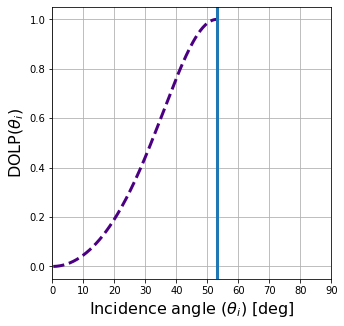

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.058314561843872 seconds
False
AoLP time:  0.04597210884094238 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 47%|██████████████████████████████████████▋                                           | 34/72 [17:55<19:35, 30.94s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.035979509353637695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197502136230469 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


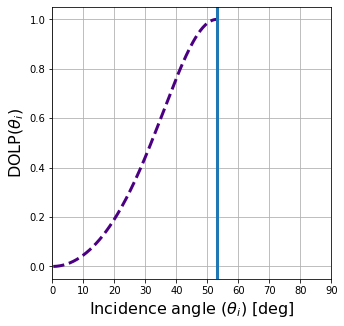

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.47482657432556 seconds
False
AoLP time:  0.04497265815734863 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 49%|███████████████████████████████████████▊                                          | 35/72 [18:26<19:08, 31.04s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.028003692626953125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


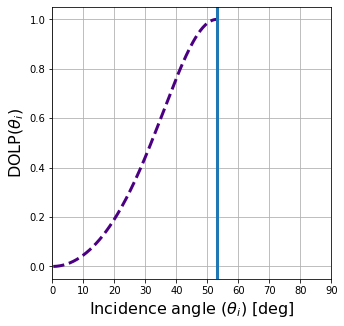

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.79392147064209 seconds
False
AoLP time:  0.04397439956665039 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 50%|█████████████████████████████████████████                                         | 36/72 [18:56<18:26, 30.74s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04097628593444824 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.061962127685546875 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


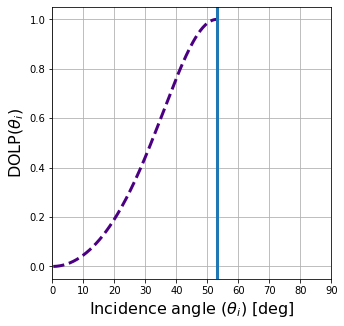

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  27.14677929878235 seconds
False
AoLP time:  0.05396890640258789 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 51%|██████████████████████████████████████████▏                                       | 37/72 [19:30<18:26, 31.62s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030981063842773438 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498196601867676 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


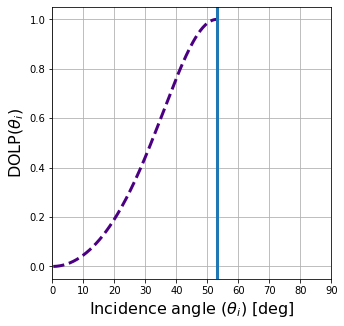

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.920676708221436 seconds
False
AoLP time:  0.05496835708618164 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 53%|███████████████████████████████████████████▎                                      | 38/72 [20:02<18:02, 31.84s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.026984691619873047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797650337219238 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


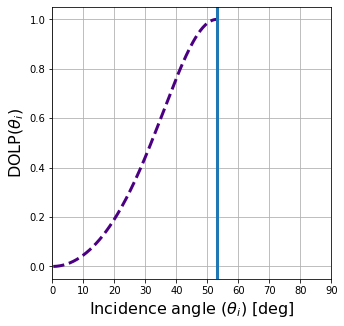

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.50519037246704 seconds
False
AoLP time:  0.05696439743041992 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 54%|████████████████████████████████████████████▍                                     | 39/72 [20:34<17:30, 31.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030490398406982422 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04197502136230469 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


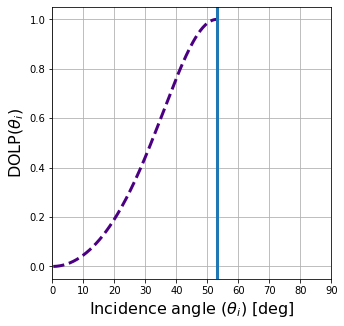

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  26.86772656440735 seconds
False
AoLP time:  0.05496954917907715 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 56%|█████████████████████████████████████████████▌                                    | 40/72 [21:06<17:02, 31.97s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897714614868164 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


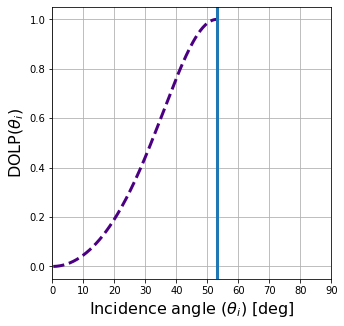

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.169718265533447 seconds
False
AoLP time:  0.06596112251281738 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 57%|██████████████████████████████████████████████▋                                   | 41/72 [21:37<16:18, 31.57s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03198981285095215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.05199241638183594 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


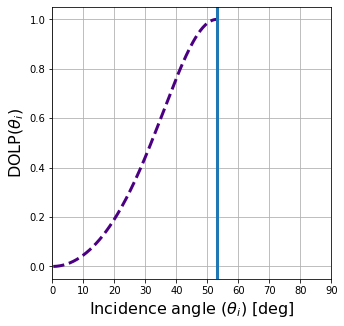

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  25.56213641166687 seconds
False
AoLP time:  0.041967153549194336 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 58%|███████████████████████████████████████████████▊                                  | 42/72 [22:08<15:41, 31.39s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0239865779876709 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.035978078842163086 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


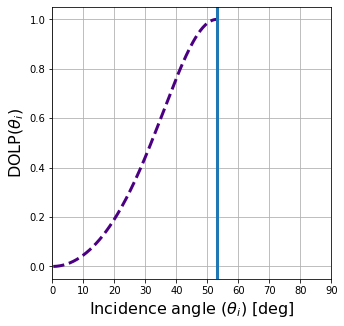

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.985206842422485 seconds
False
AoLP time:  0.04297471046447754 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 60%|████████████████████████████████████████████████▉                                 | 43/72 [22:36<14:45, 30.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02998208999633789 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04397416114807129 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


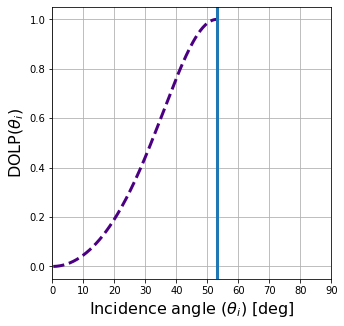

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.300607442855835 seconds
False
AoLP time:  0.0439753532409668 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 61%|██████████████████████████████████████████████████                                | 44/72 [23:05<14:00, 30.01s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.029982805252075195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.038977861404418945 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


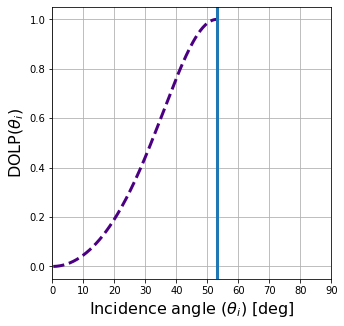

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.46160888671875 seconds
False
AoLP time:  0.05496835708618164 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 62%|███████████████████████████████████████████████████▎                              | 45/72 [23:33<13:15, 29.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.036980390548706055 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997635841369629 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


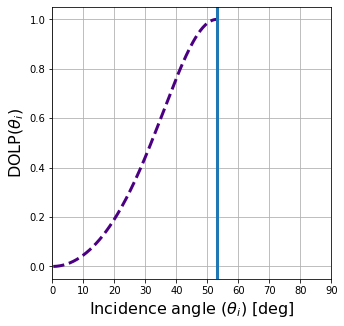

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.833199977874756 seconds
False
AoLP time:  0.057967424392700195 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 64%|████████████████████████████████████████████████████▍                             | 46/72 [24:02<12:39, 29.20s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.033980369567871094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997683525085449 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


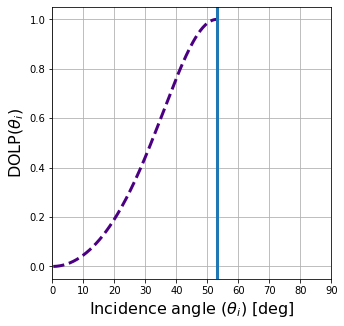

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.886117696762085 seconds
False
AoLP time:  0.04597830772399902 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 65%|█████████████████████████████████████████████████████▌                            | 47/72 [24:30<12:05, 29.00s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.04297637939453125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797721862792969 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


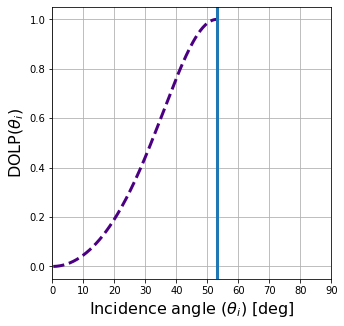

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.796846389770508 seconds
False
AoLP time:  0.03997683525085449 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 67%|██████████████████████████████████████████████████████▋                           | 48/72 [25:00<11:39, 29.14s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03349423408508301 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03148531913757324 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


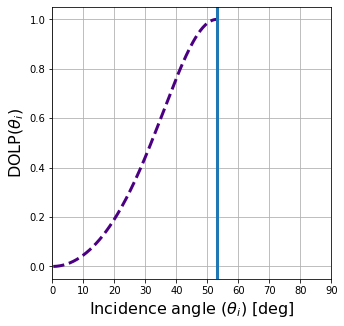

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.424128770828247 seconds
False
AoLP time:  0.049479007720947266 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 68%|███████████████████████████████████████████████████████▊                          | 49/72 [25:28<11:02, 28.82s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0259857177734375 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597903251647949 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


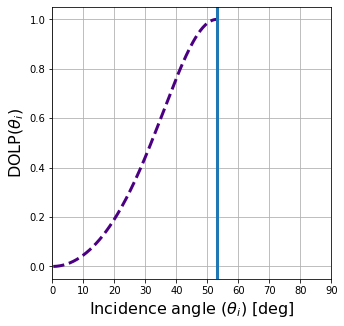

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.540847778320312 seconds
False
AoLP time:  0.0419764518737793 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 69%|████████████████████████████████████████████████████████▉                         | 50/72 [25:56<10:29, 28.61s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.030980587005615234 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03198075294494629 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


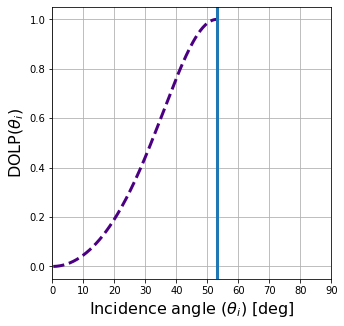

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.633630514144897 seconds
False
AoLP time:  0.05396771430969238 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 71%|██████████████████████████████████████████████████████████                        | 51/72 [26:24<09:58, 28.49s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698206901550293 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03497934341430664 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


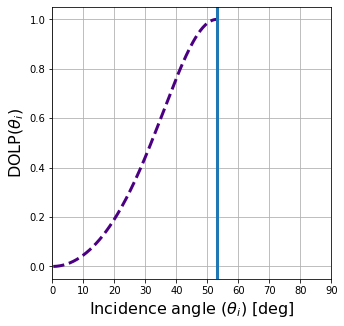

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.231830835342407 seconds
False
AoLP time:  0.03997635841369629 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 72%|███████████████████████████████████████████████████████████▏                      | 52/72 [26:52<09:26, 28.33s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03397989273071289 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03797769546508789 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


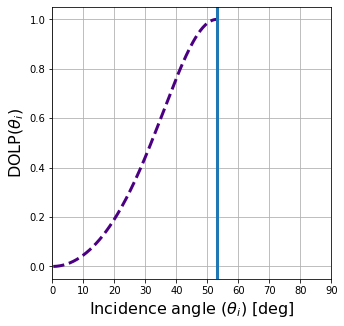

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.311898946762085 seconds
False
AoLP time:  0.04197359085083008 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 74%|████████████████████████████████████████████████████████████▎                     | 53/72 [27:21<09:01, 28.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298187255859375 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


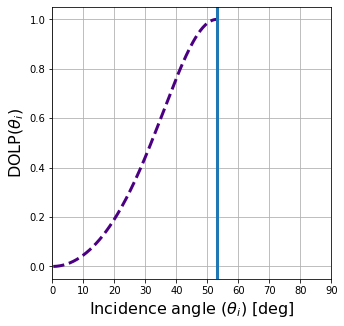

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.818023443222046 seconds
False
AoLP time:  0.049970388412475586 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 75%|█████████████████████████████████████████████████████████████▌                    | 54/72 [27:50<08:32, 28.48s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025984764099121094 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0379786491394043 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


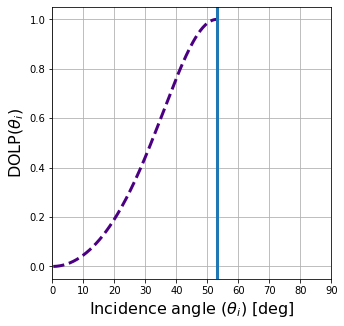

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.199151754379272 seconds
False
AoLP time:  0.046973228454589844 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 76%|██████████████████████████████████████████████████████████████▋                   | 55/72 [28:18<08:05, 28.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03298020362854004 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


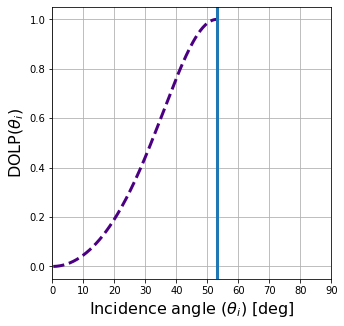

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.385669946670532 seconds
False
AoLP time:  0.03997516632080078 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 78%|███████████████████████████████████████████████████████████████▊                  | 56/72 [28:47<07:38, 28.65s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698493003845215 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03498077392578125 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


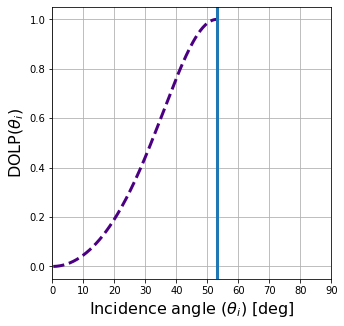

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.25332522392273 seconds
False
AoLP time:  0.04997062683105469 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 79%|████████████████████████████████████████████████████████████████▉                 | 57/72 [29:15<07:05, 28.37s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03697919845581055 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03897690773010254 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


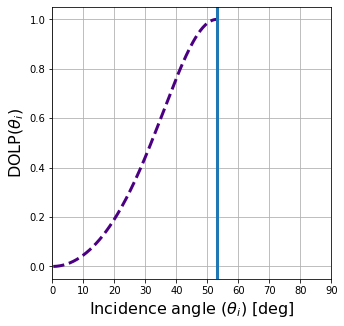

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.043467044830322 seconds
False
AoLP time:  0.03997540473937988 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 81%|██████████████████████████████████████████████████████████████████                | 58/72 [29:41<06:29, 27.83s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02698516845703125 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03349161148071289 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


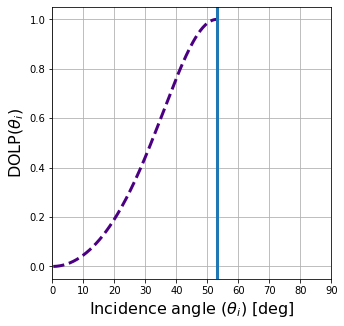

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.04995560646057 seconds
False
AoLP time:  0.0399777889251709 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 82%|███████████████████████████████████████████████████████████████████▏              | 59/72 [30:08<05:55, 27.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.022986888885498047 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.037978172302246094 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


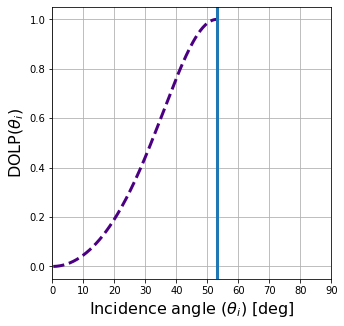

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  24.857398509979248 seconds
False
AoLP time:  0.046972036361694336 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 83%|████████████████████████████████████████████████████████████████████▎             | 60/72 [30:37<05:35, 27.96s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03697848320007324 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


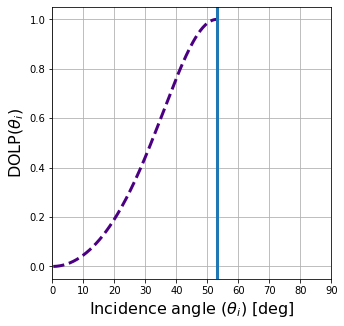

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.855574131011963 seconds
False
AoLP time:  0.05596613883972168 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 85%|█████████████████████████████████████████████████████████████████████▍            | 61/72 [31:05<05:06, 27.90s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983427047729492 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.032979726791381836 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


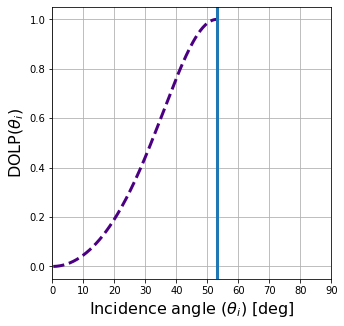

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.782197952270508 seconds
False
AoLP time:  0.04297447204589844 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 86%|██████████████████████████████████████████████████████████████████████▌           | 62/72 [31:32<04:36, 27.70s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03597831726074219 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


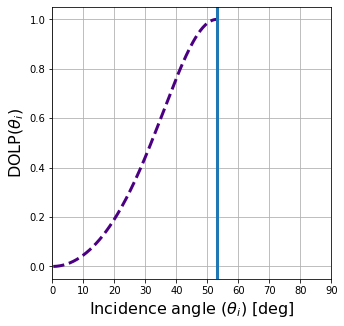

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.607574224472046 seconds
False
AoLP time:  0.04097700119018555 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 88%|███████████████████████████████████████████████████████████████████████▊          | 63/72 [31:59<04:07, 27.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.02598404884338379 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03297901153564453 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


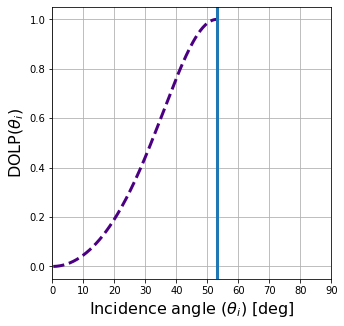

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  21.753233432769775 seconds
False
AoLP time:  0.040975093841552734 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 89%|████████████████████████████████████████████████████████████████████████▉         | 64/72 [32:25<03:36, 27.08s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025985002517700195 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03098154067993164 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


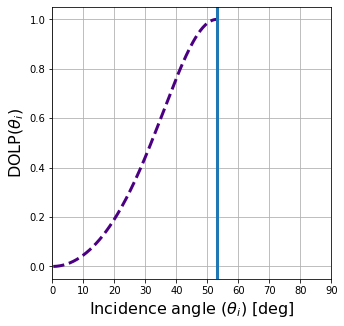

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.93118166923523 seconds
False
AoLP time:  0.04197502136230469 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 90%|██████████████████████████████████████████████████████████████████████████        | 65/72 [32:54<03:12, 27.55s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024973154067993164 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03598332405090332 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


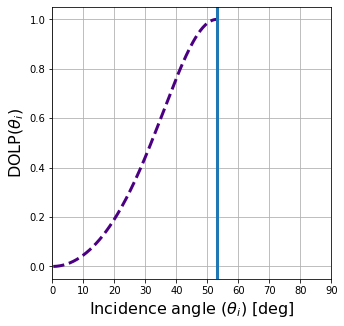

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  23.82050657272339 seconds
False
AoLP time:  0.042966604232788086 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 92%|███████████████████████████████████████████████████████████████████████████▏      | 66/72 [33:22<02:46, 27.81s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.0299837589263916 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0419769287109375 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


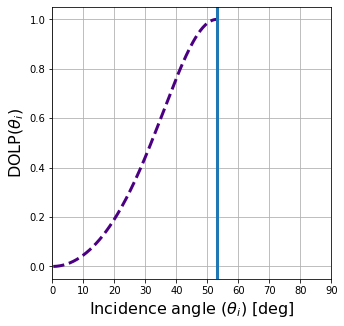

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.56125020980835 seconds
False
AoLP time:  0.03997445106506348 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 93%|████████████████████████████████████████████████████████████████████████████▎     | 67/72 [33:50<02:18, 27.63s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.027983903884887695 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.04097628593444824 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


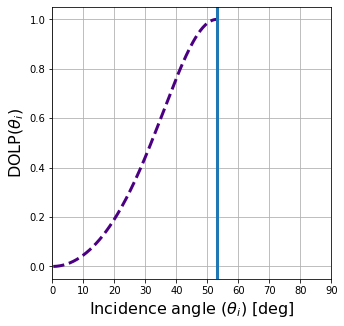

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.879683256149292 seconds
False
AoLP time:  0.04398179054260254 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 94%|█████████████████████████████████████████████████████████████████████████████▍    | 68/72 [34:17<01:50, 27.53s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.03298044204711914 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03501081466674805 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


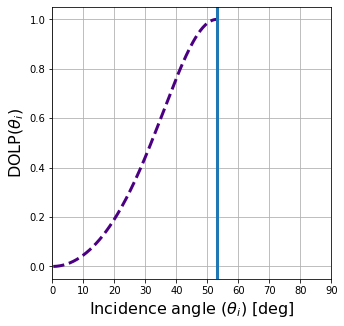

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.448682069778442 seconds
False
AoLP time:  0.04397273063659668 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 96%|██████████████████████████████████████████████████████████████████████████████▌   | 69/72 [34:44<01:22, 27.38s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985074996948242 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03398013114929199 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


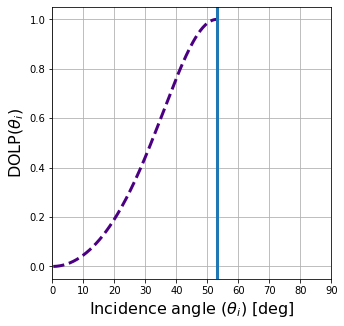

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.115638971328735 seconds
False
AoLP time:  0.05097079277038574 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 97%|███████████████████████████████████████████████████████████████████████████████▋  | 70/72 [35:10<00:54, 27.09s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.025987863540649414 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.03997659683227539 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


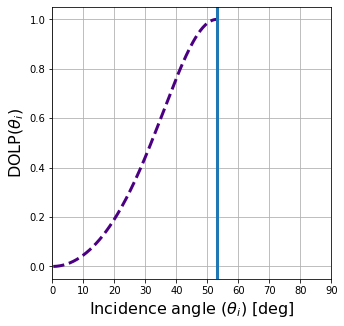

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.412621021270752 seconds
False
AoLP time:  0.04097485542297363 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
 99%|████████████████████████████████████████████████████████████████████████████████▊ | 71/72 [35:37<00:26, 26.98s/it]

Processing data for material : WATER
image_data shape is :  (2048, 2448)
im90 shape is :  (1024, 1224)
Stokes time:  0.024985313415527344 s
im_stokes0 shape is :  (1024, 1224)
DoLP time:  0.0339808464050293 s
im_DOLP shape is :  (1024, 1224)


C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:228: RuntimeWarning: invalid value encountered in true_divide
  alpha = 0.5*(np.tan(thI-thT)/np.tan(thI+thT))**2
C:\Users\tracy\Downloads\saksham_polarimetric_cam\scripts\rawFLIR_polarization_data_extraction.py:229: RuntimeWarning: invalid value encountered in true_divide
  eta = 0.5*(np.sin(thI-thT)/np.sin(thI+thT))**2


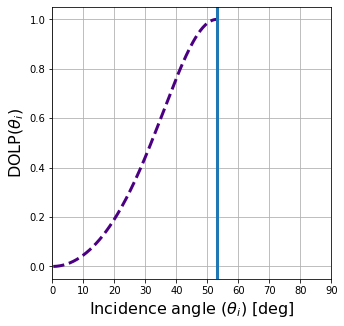

C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


Time for DOLP2Theta conversion is :  22.306334972381592 seconds
False
AoLP time:  0.03797793388366699 s


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
100%|██████████████████████████████████████████████████████████████████████████████████| 72/72 [36:04<00:00, 26.87s/it]


In [13]:
i=-1
cumul_height_map = np.zeros(im_theta1.shape, dtype = 'complex')
for filename2 in tqdm(filenames): #
    i+=1
    im_theta2, im_phi2 = theta_phi(filename2, file_location,
                               material = 'water',
                               flat_field_correct = 1,
                               gaussian_smoothing_sigma = 0,
                               dark_files_location= dark_files_location, flat_files_location= flat_files_location,
                               num_images= NUM_IMAGES, correction_angle=0)

    raw_img2 = cv2.imread(os.path.join(file_location, filename2))
    
    # get slopes and height maps
    s_x = np.tan(np.radians((im_theta2 - im_theta1)))
    s_y = np.tan(np.radians((im_phi2 - im_phi1)))
    s_hat_x, s_hat_y = slopeFieldFFT(s_x, s_y, suppress_fig = 1)
    height_map = slope2height(s_hat_x, s_hat_y)
    all_height_maps[:,:,i] = height_map
    all_sx_maps[:,:,i] = s_x
    all_sy_maps[:,:,i] = s_y
    all_raw_frames_0filter[:,:,i] = raw_img2[::2,::2,0]

In [14]:
all_data_dict = {'all_height_maps': all_height_maps, 'all_sx_maps': all_sx_maps, \
                 'all_sy_maps':all_sy_maps, 'all_raw_frames_0filter':all_raw_frames_0filter}

tic = time.time()
with open(os.path.join(save_location,data_filename), 'wb') as handle:
    pickle.dump(all_data_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('time taken = ', time.time() - tic)

time taken =  8.850224256515503


In [15]:
# for k in all_data_dict_loaded.keys():
#     print(all_data_dict_loaded[k].all() == all_data_dict[k].all())

In [16]:
# time_mean_height_map = cumul_height_map/len(filenames)

## Plot the manually generated facets - Algebraic method

In [17]:
# import numpy as np

# def rotationX(alpha):
#     temp  = [[1, 0, 0],\
#              [0, np.cos(alpha), -np.sin(alpha)],
#              [0, np.sin(alpha), np.cos(alpha)]]
#     return temp

# def rotationY(alpha):
#     temp  = [[np.cos(alpha), 0, np.sin(alpha)],\
#              [0, 1, 0],
#              [-np.sin(alpha), 0, np.cos(alpha)]]
#     return temp

# rows, cols = im_theta1.shape

# x = np.arange(0, cols)
# y = np.arange(0, rows)

# X, Y = np.meshgrid(x,y)
# Z = np.zeros((rows,cols)) # Z = 0 at node (0,0)


# # parameters of the any plane facet that need to keeo updating
# nx = np.zeros((rows,cols))
# ny = np.zeros((rows,cols))
# nz = np.zeros((rows,cols))

# visited = np.zeros((rows,cols))
# d = np.zeros((rows,cols))
# visited[0,0]  = 1

# # evaluate the normals nx, ny, nz
# delta_theta = np.radians(im_theta2 - im_theta1)
# delta_phi = np.radians(im_phi2 - im_phi1)
# for i in tqdm(range(rows)):
#     for j in range(cols):
#         temp = rotationX(delta_theta[i,j]) @ np.array([0,0,1]).reshape(3,1)
#         nx[i,j] = temp[0]

#         temp = rotationY(delta_phi[i,j]) @ np.array([0,0,1]).reshape(3,1)
#         ny[i,j] = temp[0]

# nz = np.sqrt(1 - nx**2 - ny**2)
# assert nz.shape == im_theta1.shape

In [18]:
# for i in tqdm(range(rows)):
#     for j in range(cols):
#         if i==0 and j!=0: # Z = 0 at node (0,0)
#             Z[i,j] = -d[i,j-1] - nx[i,j-1]*X[i,j] - ny[i,j-1]*Y[i,j]
#             Z[i,j]/= nz[i,j-1]
#         elif i!=0 and j==0:
#             Z[i,j] = -d[i-1,j] - nx[i-1,j]*X[i,j] - ny[i-1,j]*Y[i,j]
#             Z[i,j]/= nz[i-1,j]
#         elif i!=0 and j!=0:
#             Z_north= -d[i-1,j] - nx[i-1,j]*X[i,j] - ny[i-1,j]*Y[i,j]
#             Z_north/= nz[i-1,j]
            
#             Z_west = -d[i,j-1] - nx[i,j-1]*X[i,j] - ny[i,j-1]*Y[i,j]
#             Z_west/= nz[i,j-1]
            
#             Z_diag = -d[i-1,j-1] - nx[i-1,j-1]*X[i,j] - ny[i-1,j-1]*Y[i,j]
#             Z_diag/= nz[i-1,j-1]

#             Z[i,j] = np.mean([Z_west, Z_north, Z_diag])
#         d[i,j] = -nx[i,j]*X[i,j]- ny[i,j]*Y[i,j] - nz[i,j]*Z[i,j]
#         visited[i,j] = 1


In [19]:
# plt.imshow(Z)
# plt.colorbar()